In [1]:
import pandas as pd

df_train = pd.read_json("./data/train_lem.json")

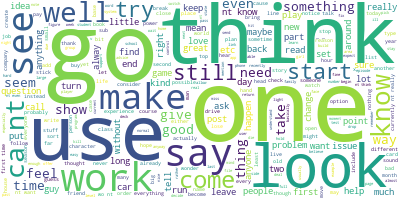

In [2]:
'''Wordcloud készítése a gyakori szavakról'''

from wordcloud import WordCloud

long_string = ','.join(df_train['text'])

wordcloud = WordCloud(background_color="white", 
                      max_words=1000, 
                      contour_width=3, 
                      contour_color='steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

In [3]:
import gensim.corpora as corpora

text = df_train['text']

data_words = [item.split() for item in text]

id2word = corpora.Dictionary(data_words)

print(id2word)

E:\Anaconda\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
Dictionary(204932 unique tokens: ['able', 'accurate', 'actuality', 'address', 'afraid']...)


In [4]:
'''Dokumentum szótár felépítése (index - gyakoriság)'''

corpus = [id2word.doc2bow(text) for text in data_words]

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 3), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 3), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 1), (28, 3), (29, 1)]


In [5]:
'''Szavakhoz gyakorisági súly hozzárendelése'''

import gensim

num_topics = 102

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=102)

lda_model.print_topics()

[(17,
  '0.087*"logo" + 0.030*"disc" + 0.013*"edition" + 0.012*"one" + 0.011*"nt" + 0.010*"get" + 0.010*"xbox" + 0.009*"want" + 0.008*"look" + 0.008*"quest"'),
 (75,
  '0.010*"uk" + 0.009*"apple" + 0.009*"one" + 0.008*"nt" + 0.007*"carry" + 0.006*"would" + 0.006*"go" + 0.005*"like" + 0.004*"psu" + 0.004*"finns"'),
 (73,
  '0.017*"nt" + 0.011*"get" + 0.010*"make" + 0.009*"like" + 0.008*"go" + 0.007*"one" + 0.007*"time" + 0.006*"know" + 0.006*"worm" + 0.006*"well"'),
 (76,
  '0.017*"car" + 0.013*"get" + 0.011*"would" + 0.010*"nt" + 0.010*"pack" + 0.009*"bar" + 0.008*"like" + 0.008*"go" + 0.007*"buy" + 0.006*"use"'),
 (24,
  '0.014*"pad" + 0.013*"nt" + 0.013*"use" + 0.013*"dc" + 0.012*"tank" + 0.008*"ur" + 0.007*"work" + 0.007*"would" + 0.005*"firmware" + 0.005*"backup"'),
 (99,
  '0.014*"journal" + 0.010*"trip" + 0.010*"wd" + 0.010*"torrent" + 0.010*"nt" + 0.009*"recording" + 0.008*"like" + 0.008*"would" + 0.007*"think" + 0.007*"labour"'),
 (58,
  '0.024*"would" + 0.014*"card" + 0.014*"y

In [6]:
'''Vizualizáció'''

import os
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./data/lda_'+str(num_topics))

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    pyLDAvis.save_html(LDAvis_prepared, './data/lda_'+ str(num_topics) +'.html')

LDAvis_prepared

E:\Anaconda\lib\site-packages\sklearn\linear_model\_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
E:\Anaconda\lib\site-packages\sklearn\linear_model\_least_angle.py:164: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
93    -0.116106 -0.050548       1        1  6.625271
50    -0.055799 -0.060002       2        1  4.563362
37    -0.059893 -0.002084       3        1  3.823213
68    -0.093067 -0.000782       4        1  3.671498
89     0.010348 -0.088233       5        1  3.584679
...         ...       ...     ...      ...       ...
95     0.070509  0.040976      98        1  0.301722
69     0.017431  0.108128      99        1  0.269753
0      0.093476  0.063786     100        1  0.257249
80     0.046049  0.085055     101        1  0.210770
32     0.136231  0.089712     102        1  0.210280

[102 rows x 5 columns], topic_info=         Term          Freq         Total  Category  logprob  loglift
111        nt  74761.000000  74761.000000   Default  30.0000  30.0000
224       get  51933.000000  51933.000000   Default  29.0000  29.0000
442     would  37830.000000  37830.000000   Default  28.0000  28.0000
95       like  41202.000000  41202.000000   Default  27.0000  27.0000
2244        _   2738.000000   2738.000000   Default  26.0000  26.0000
...       ...           ...           ...       ...      ...      ...
81      issue     36.315261   6887.421640  Topic102  -5.5863   0.9193
179      make     36.795352  25026.177970  Topic102  -5.5732  -0.3578
1465  connect     32.286883   2093.370252  Topic102  -5.7039   1.9926
442     would     35.028242  37830.590551  Topic102  -5.6224  -0.8202
95       like     33.878845  41202.377144  Topic102  -5.6557  -0.9390

[8065 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
2244      1  0.004746     _
2244      2  0.007667     _
2244      3  0.002921     _
2244      4  0.002191     _
2244      5  0.007667     _
...     ...       ...   ...
3667     20  0.031533  zoom
3667     21  0.472992  zoom
3667     42  0.021022  zoom
3667     43  0.042044  zoom
3667     66  0.010511  zoom

[82873 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[94, 51, 38, 69, 90, 49, 57, 65, 35, 36, 91, 87, 4, 28, 3, 41, 93, 95, 84, 53, 48, 20, 80, 47, 79, 22, 39, 11, 32, 99, 5, 77, 42, 92, 88, 17, 66, 6, 37, 62, 40, 59, 23, 89, 54, 2, 30, 61, 101, 44, 102, 67, 55, 15, 34, 63, 19, 8, 16, 9, 73, 71, 50, 45, 18, 12, 86, 82, 85, 75, 78, 52, 98, 74, 100, 24, 56, 97, 26, 10, 31, 29, 7, 58, 14, 76, 72, 21, 68, 43, 60, 13, 25, 83, 27, 46, 64, 96, 70, 1, 81, 33])